Problem Statement:
The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg
.Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and 
crew.While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than
others.In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more like
ly to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [2]:
import os
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import scikitplot as skplt
from sklearn.metrics import f1_score

In [3]:
df=pd.read_csv("train.csv")
df.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df=df.drop(['Cabin','PassengerId','Ticket','Name'],axis=1)
df=df.dropna()

In [7]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
Pclass      712 non-null int64
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB



# Data preprocessing

Label encoding v/s Hot Encoding

Categorical Variables:
1) Nominal
2) Ordinal

In [12]:
sex=pd.get_dummies(X['Sex'])              # Hot encoding since the variables are Nominal Categorical type
embarked=pd.get_dummies(X['Embarked'])
X=pd.concat([X,sex,embarked],axis=1)
X.drop(['Sex','Embarked'],axis=1,inplace=True)


In [13]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [14]:
X.drop(['male','C'],axis=1,inplace=True)
X.columns=['Pclass','Age','SibSp','Parch','Fare','Sex','Embarked_Q','Embarked_S']
print(X.head())

   Pclass   Age  SibSp  Parch     Fare  Sex  Embarked_Q  Embarked_S
0       3  22.0      1      0   7.2500    0           0           1
1       1  38.0      1      0  71.2833    1           0           0
2       3  26.0      0      0   7.9250    1           0           1
3       1  35.0      1      0  53.1000    1           0           1
4       3  35.0      0      0   8.0500    0           0           1


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.07,random_state=121)
print("X_train shape: "+str(X_train.shape))
print("X_test shape: "+str(y_test.shape))
print("y_train shape: "+str(y_train.shape))
print("y_test shape: "+str(y_test.shape))

X_train shape: (662, 8)
X_test shape: (50,)
y_train shape: (662,)
y_test shape: (50,)


In [16]:
lg=LogisticRegression(random_state=12)
lg.fit(X_train,y_train)
y_pred_train=lg.predict(X_train)
y_pred_train_prob=lg.predict_proba(X_train)
y_pred_test=lg.predict(X_test)
y_pred_test_prob=lg.predict_proba(X_test)



C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


f1_score_Train: 0.748


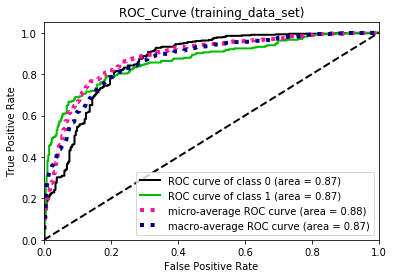

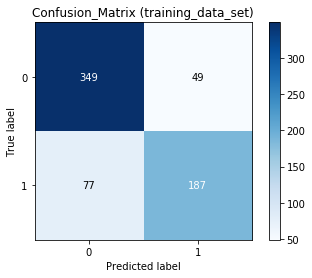

In [17]:
import scikitplot as skplt
from sklearn.metrics import f1_score
skplt.metrics.plot_roc(y_train,y_pred_train_prob,title="ROC_Curve (training_data_set)")
skplt.metrics.plot_confusion_matrix(y_train,y_pred_train,title="Confusion_Matrix (training_data_set)")
print("f1_score_Train: "+str(f1_score(y_train,y_pred_train)))

f1_score_Test: 0.6818181818181818


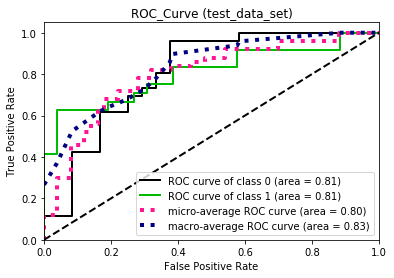

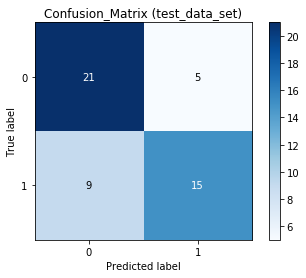

In [18]:
skplt.metrics.plot_roc(y_test,y_pred_test_prob,title="ROC_Curve (test_data_set)")
skplt.metrics.plot_confusion_matrix(y_test,y_pred_test,title="Confusion_Matrix (test_data_set)")
print("f1_score_Test: "+str(f1_score(y_test,y_pred_test)))

# Normalizing Data

In [19]:
X_Age_min=X['Age'].min()
X_Age_max=X['Age'].max()
X['Age']=(X['Age']-X_Age_min)/(X_Age_max-X_Age_min)
X_fare_min=X['Fare'].min()
X_fare_max=X['Fare'].max()
X['Fare']=(X['Fare']-X_fare_min)/(X_fare_max-X_fare_min)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.07,random_state=121)
print("X_train shape: "+str(X_train.shape))
print("X_test shape: "+str(y_test.shape))
print("y_train shape: "+str(y_train.shape))
print("y_test shape: "+str(y_test.shape))

X_train shape: (662, 8)
X_test shape: (50,)
y_train shape: (662,)
y_test shape: (50,)


In [20]:
lg=LogisticRegression(random_state=12)
lg.fit(X_train,y_train)
y_pred_train=lg.predict(X_train)
y_pred_train_prob=lg.predict_proba(X_train)
y_pred_test=lg.predict(X_test)
y_pred_test_prob=lg.predict_proba(X_test)



C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


f1_score: 0.7374749498997997


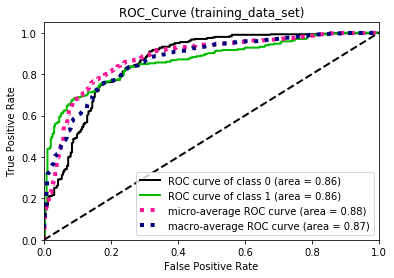

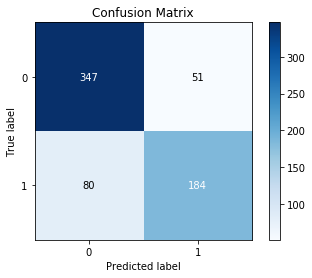

In [21]:

skplt.metrics.plot_roc(y_train,y_pred_train_prob,title="ROC_Curve (training_data_set)")
skplt.metrics.plot_confusion_matrix(y_train,y_pred_train)
print("f1_score: "+str(f1_score(y_train,y_pred_train)))

f1_score: 0.7272727272727272


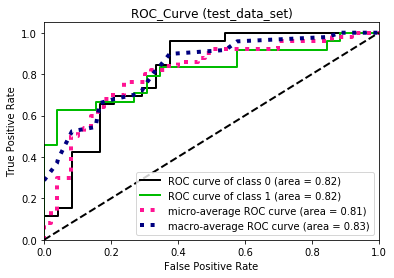

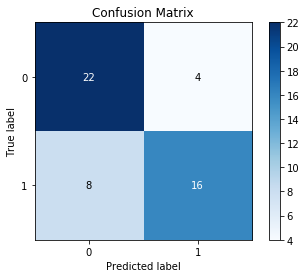

In [22]:
skplt.metrics.plot_roc(y_test,y_pred_test_prob,title="ROC_Curve (test_data_set)")
skplt.metrics.plot_confusion_matrix(y_test,y_pred_test)
print("f1_score: "+str(f1_score(y_test,y_pred_test)))